In [5]:
import ldpc_jossy.py.ldpc as ldpc
import numpy as np
from PIL import Image
from scipy.fft import fft, ifft
import simpleaudio as sa
import sounddevice as sd
from scipy.io.wavfile import write, read
import scipy
from transmitter import LDPC
import matplotlib.pyplot as plt
from scipy.signal import chirp
from transmitter import *
from reciever import *
import time

In [2]:
fs = 44100
class OFDM:
    pass
ofdm = OFDM()
ofdm.N = 2048                   # Length of DTF
ofdm.start_bin = 50
ofdm.end_bin = 788
ofdm.CP = 256                      
ofdm.sfp = 60                   # Symbols per frame

ofdm.num_tones = 21             # Number of pilot tones
ofdm.pilot_locs = np.int64(np.linspace(49,789,ofdm.num_tones))     # Pilot locations
ofdm.pilot_vals = np.array([1+1j]*21)

ofdm.rate = "1/2"
ofdm.z = 81

ofdm.bps = 2                    # bits per symbol QFSK
ofdm.spb = 720                  # data symbols per block
ofdm.preamb = ofdm.N//2
ofdm.QFSK_dict = {              # The constellation
    (1,1) : -1-1j,
    (1,0) :  1-1j,
    (0,0) :  1+1j,
    (0,1) : -1+1j}

In [62]:
bit_array = np.random.randint(2, size=100000)



zeros = np.array([0])
ones = np.ones(5)
errors = np.concatenate((zeros,ones))


In [63]:
ldpc = LDPC(rate = ofdm.rate, z = ofdm.z)
ldpc_ified = np.array(ldpc.encode(bit_array).flatten())


In [13]:
coder = LDPC(rate = ofdm.rate, z = ofdm.z)
decoded = coder.decode(ldpc_ified)
decoded = np.int64(decoded).flatten()

decoded,bit_array
error_(decoded,bit_array)
    

(21384,)
21384
(21384,)


0.0

In [69]:
l = 100
part = int(l/2)
times = []
errorlisty = []
errorlistb = []
i_list = []
copy = np.zeros(len(ldpc_ified))

for i in range(1,part):
    print(i)
    zeros = np.zeros(i)
    ones = np.ones(l-i)
    errors = np.concatenate((zeros,ones))
    for j in range(len(ldpc_ified)):
        copy[j] = np.random.choice(errors)*ldpc_ified[j]
    

    start = time.time()
    decoded = coder.decode(copy)
    end = time.time()
    times.append(end - start)

    decoded = np.int64(decoded).flatten()
    i_list.append(i)
    errorlisty.append(error_(copy,ldpc_ified))
    errorlistb.append(error_(decoded,bit_array))


1
(200232,)
200232
(200232,)
2
(200232,)
200232
(200232,)
3
(200232,)
200232
(200232,)
4
(200232,)
200232
(200232,)
5
(200232,)
200232
(200232,)
6
(200232,)
200232
(200232,)
7
(200232,)
200232
(200232,)
8
(200232,)
200232
(200232,)
9
(200232,)
200232
(200232,)
10
(200232,)
200232
(200232,)
11
(200232,)
200232
(200232,)
12
(200232,)
200232
(200232,)
13
(200232,)
200232
(200232,)
14
(200232,)
200232
(200232,)
15
(200232,)
200232
(200232,)
16
(200232,)
200232
(200232,)
17
(200232,)
200232
(200232,)
18
(200232,)
200232
(200232,)
19
(200232,)
200232
(200232,)
20
(200232,)
200232
(200232,)
21
(200232,)
200232
(200232,)
22
(200232,)
200232
(200232,)
23
(200232,)
200232
(200232,)
24
(200232,)
200232
(200232,)
25
(200232,)
200232
(200232,)
26
(200232,)
200232
(200232,)
27
(200232,)
200232
(200232,)
28
(200232,)
200232
(200232,)
29
(200232,)
200232
(200232,)
30
(200232,)
200232
(200232,)
31
(200232,)
200232
(200232,)
32
(200232,)
200232
(200232,)
33
(200232,)
200232
(200232,)
34
(200232,)
200232

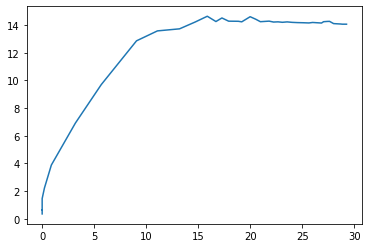

In [70]:
plt.plot(errorlistb, times)

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49]

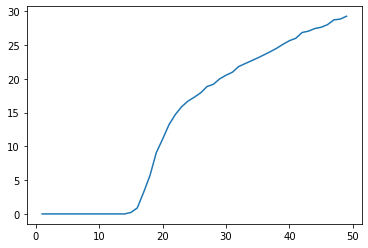

In [71]:
plt.plot(i_list,errorlistb)
i_list